# <center> Credit Card customers <center>

### Problem Statement:
>A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

### Business Goal:
>Build a Logistic Regression model to predict which and all customers are going to churn, and which customers needed to focus more to regain our business.

In [151]:
# importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
pd.set_option("max_rows",100)

### Interpretation of Dataset

In [152]:
# Reading the dataset
df = pd.read_csv("BankChurners.csv")
print(df.shape)
df.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [154]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Here, the last 2 columns are useless for our model..SO, better drop it here itself..

In [155]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)

In [156]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [157]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

We dont have the missing values here...So, lets understand each features individually..

In [158]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

Here, we have our target variable `Attrition_Flag` with 84% Existing customers and 16% churned customers...Its really an inbalance one..

In [159]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({"Existing Customer":'Not churn',"Attrited Customer":'churn'})

### Data Preparation

In [160]:
Client = df['CLIENTNUM']
df.drop("CLIENTNUM",1,inplace=True)

We have stored our customer ID for later purpose if need...

In [161]:
num_var = list(df.describe().columns)
num_var.pop(0)

'Customer_Age'

In [162]:
car_var = list(df.describe(exclude=['int64','float64']).columns)
car_var

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Now, its the time to encode our categorical variable into binary levels for modelling..

In [163]:
# lets make an category for age group..
df['Cust_age_category'] = pd.cut(df1['Customer_Age'],bins=5)
df['Cust_age_category'] = df['Cust_age_category'].astype('object')

In [164]:
df1 = df.copy()
df1.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cust_age_category
0,Not churn,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,"(44.8, 54.2]"
1,Not churn,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,"(44.8, 54.2]"


In [165]:
df1['Attrition_Flag'] = df1['Attrition_Flag'].apply(lambda i: 0 if i=='Not churn' else 1)
df1['Gender'] = df1['Gender'].apply(lambda i: 0 if i=='F' else 1)

1. `'Education_Level','Marital_Status','Income_Category','Cust_age_category'`<< these are the dummy variables we need to take care for decoding..
2. For Card category, lets apply an `Target guided Ordinal Encoding`..

In [166]:
dummy_education = pd.get_dummies(df1['Education_Level'],prefix='Education_level',prefix_sep=' - ')
dummy_education.drop('Education_level - Unknown',1,inplace=True)

dummy_Income = pd.get_dummies(df1['Income_Category'],prefix='Income_Category',prefix_sep=' - ')
dummy_Income.drop('Income_Category - Unknown',1,inplace=True)

dummy_marital = pd.get_dummies(df1['Marital_Status'],prefix='Marital_status',prefix_sep=' - ')
dummy_marital.drop('Marital_status - Unknown',1,inplace=True)

dummy_age = pd.get_dummies(df1['Cust_age_category'],prefix='Age',prefix_sep=' - ')
dummy_age.drop('Age - (63.6, 73.0]',1,inplace=True)


In [167]:
cat = df1.groupby(["Card_Category"])['Attrition_Flag'].mean().to_dict()
df1['Card_Category'] = df1['Card_Category'].map(cat)

In [168]:
data = pd.concat([df1,dummy_age,dummy_marital,dummy_education,dummy_Income],axis=1)
data.drop(["Education_Level","Marital_Status","Cust_age_category","Customer_Age","Income_Category"],axis=1,inplace=True)
data.head()

,Attrition_Flag,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_level - Doctorate,Education_level - Graduate,Education_level - High School,Education_level - Post-Graduate,Education_level - Uneducated,Income_Category - $120K +,Income_Category - $40K - $60K,Income_Category - $60K - $80K,Income_Category - $80K - $120K,Income_Category - Less than $40K
0,0,1,3,0.160979,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,0,1,0,0
1,0,0,5,0.160979,44,6,1,2,8256.0,864,...,0,1,0,0,0,0,0,0,0,1
2,0,1,3,0.160979,36,4,1,0,3418.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,4,0.160979,34,3,4,1,3313.0,2517,...,0,0,1,0,0,0,0,0,0,1
4,0,1,3,0.160979,21,5,1,0,4716.0,0,...,0,0,0,0,1,0,0,1,0,0


Now, we have perfectly encoded our all categorical variables for modelling

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Attrition_Flag                    10127 non-null  int64  
 1   Gender                            10127 non-null  int64  
 2   Dependent_count                   10127 non-null  int64  
 3   Card_Category                     10127 non-null  float64
 4   Months_on_book                    10127 non-null  int64  
 5   Total_Relationship_Count          10127 non-null  int64  
 6   Months_Inactive_12_mon            10127 non-null  int64  
 7   Contacts_Count_12_mon             10127 non-null  int64  
 8   Credit_Limit                      10127 non-null  float64
 9   Total_Revolving_Bal               10127 non-null  int64  
 10  Avg_Open_To_Buy                   10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 12  Tota

### Outlier Analysis

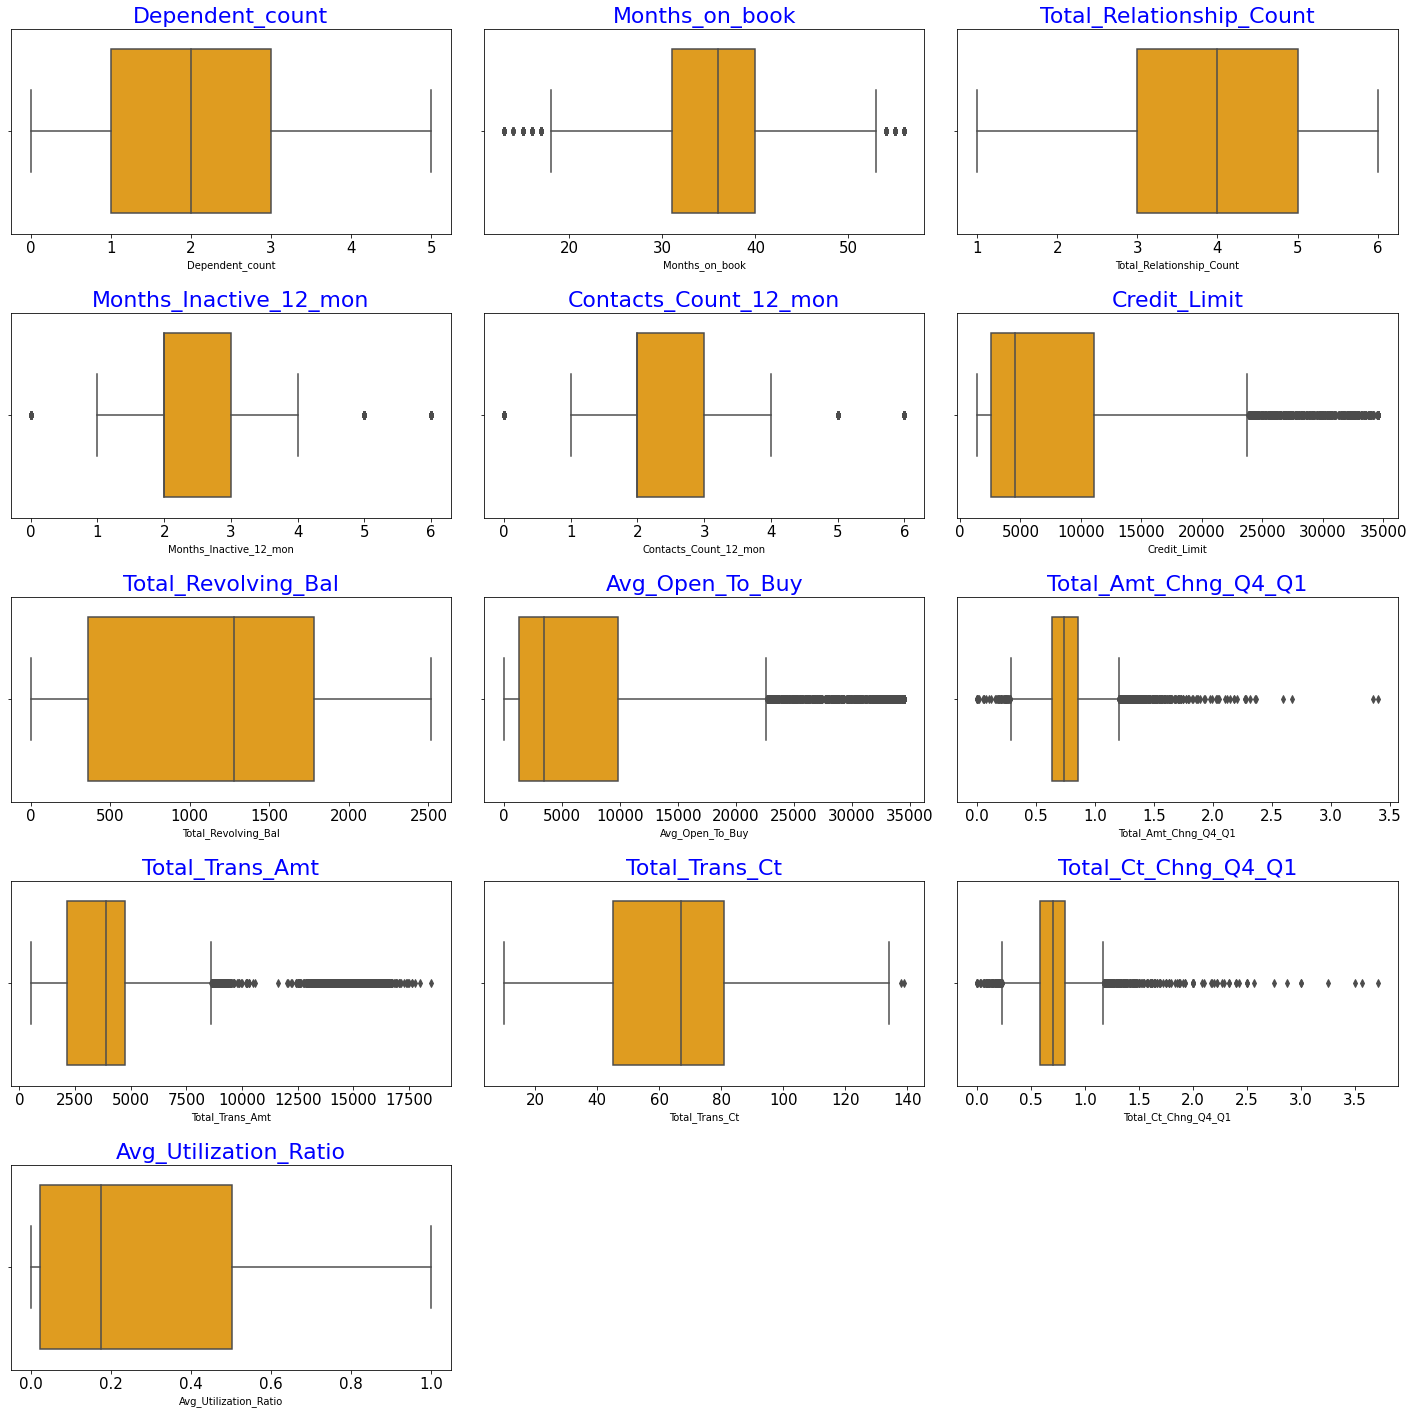

In [171]:
plt.figure(figsize=[20,20])
j = 1

for i in num_var:
    plt.subplot(5,3,j)
    sns.boxplot(df[i],color='orange')
    plt.title(i,color='blue',fontsize=22)
    plt.xticks(fontsize=15,fontweight=30,color='black')
    plt.tight_layout(pad=2)
    j += 1
    
plt.show()

from the boxplot above, we can conclude that our features are no need for outlier treatment

In [172]:
df[num_var].describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


The spread of the data's in all features are also quite good

### EDA 

In [173]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cust_age_category
0,Not churn,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,"(44.8, 54.2]"
1,Not churn,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,"(44.8, 54.2]"


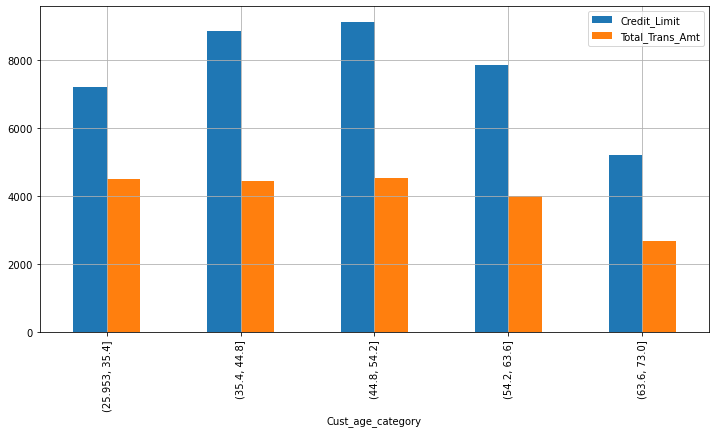

In [174]:
df.groupby('Cust_age_category')['Credit_Limit','Total_Trans_Amt'].mean().plot(kind='bar',figsize=[12,6])
plt.grid()
plt.show()

#### 1. So, age group b/w 44-54 are having huge credit limit than others, might be working professionals..
#### 2.  Old aged customers b/w 64-73 are actually not in active due to low transaction, might be due to health conditions..

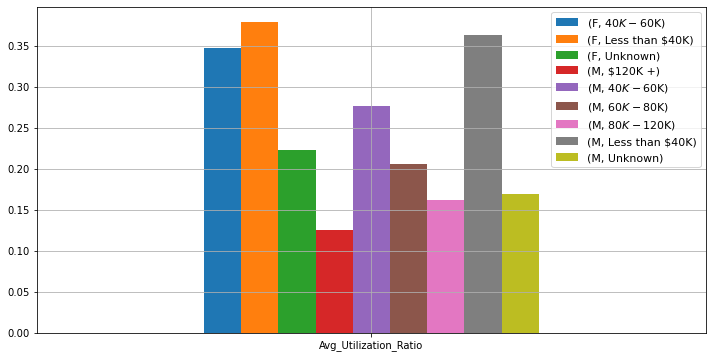

In [175]:
pd.pivot_table(data=df,values='Avg_Utilization_Ratio',columns=["Gender","Income_Category"],
                                           aggfunc=np.mean).plot(kind='bar',figsize=[12,6])
plt.legend(fontsize=11)
plt.grid()
plt.xticks(rotation=0)
plt.show()

#### 1. So, females who are earnings below `$40k` are actually utilising the credit more as compared to others..
#### 2. Also, Males with more than `$120k` earnings are using the facility with a limit, might be due to insufficient time. The assumption applied here is when salary increases, the time to spend with families decreases.

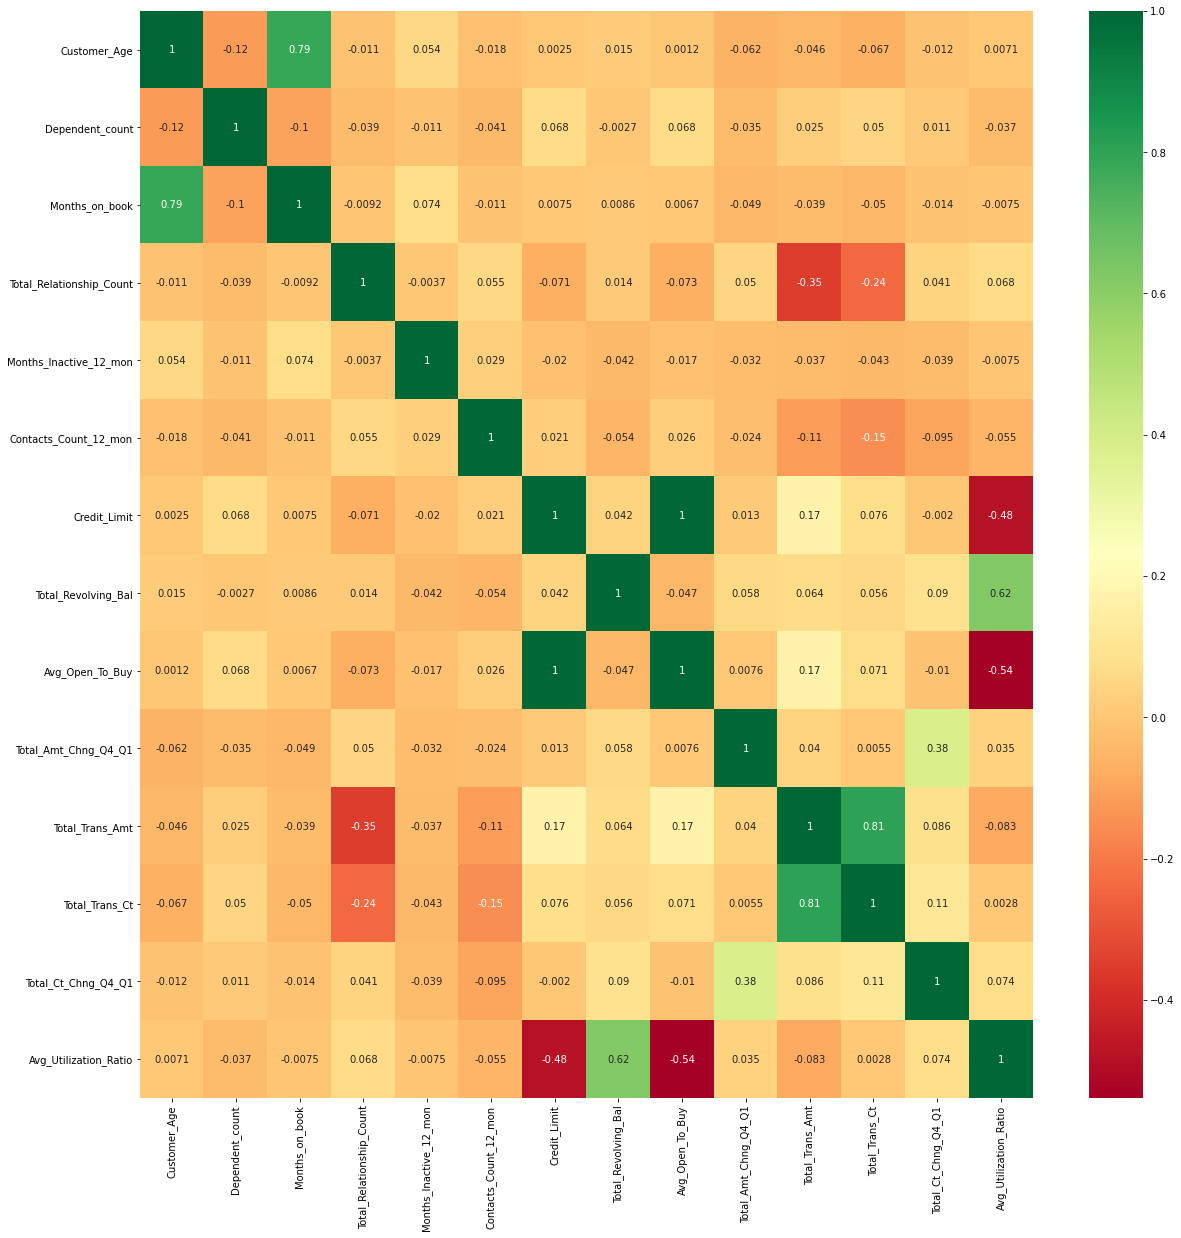

In [176]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Here, we can infer that 
1. `Total_Trans_Amt` and `Total_trans_Ct` are having higher positive correlation
2. The high aged customers are having higher relationship towards the bank.

### Building the model

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [272]:
scaler = MinMaxScaler()
data[num_var] = scaler.fit_transform(data[num_var])

In [273]:
X = data.iloc[:,1:]
y = data['Attrition_Flag']

In [274]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,stratify=y,random_state=100)
print(X_train.shape)
print(y_test.shape)

(7088, 33)
(3039,)


In [275]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [276]:
model = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7055
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1661.4
Date:                Sat, 29 May 2021   Deviance:                       3322.8
Time:                        01:26:07   Pearson chi2:                 6.83e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.4826      1.366      1.817      0.069      -0.195       5.160
Gender                              -0.8210      0.175     -4.679      0.000      -1.165      -0.477
Dependent_count                      0.3190      0.196      1.626      0.104      -0.066       0.704
Card_Category                        4.0949      7.570      0.541      0.589     -10.743      18.932
Months_on_book                      -0.0341      0.363     -0.094      0.925      -0.746       0.678
Total_Relationship_Count            -2.1619      0.164    -13.170      0.000      -2.484      -1.840
Months_Inactive_12_mon               3.1175      0.270     11.551      0.000       2.589       3.646
Contacts_Count_12_mon                3.1856      0.266     11.955      0.000       2.663       3.708
Credit_Limit                        -0.2284      0.124     -1.848      0.065      -0.471       0.014
Total_Revolving_Bal                 -2.2828      0.212    -10.750      0.000      -2.699      -1.867
Avg_Open_To_Buy                      0.0508      0.122      0.418      0.676      -0.188       0.289
Total_Amt_Chng_Q4_Q1                -1.3890      0.766     -1.813      0.070      -2.890       0.112
Total_Trans_Amt                      8.7917      0.489     17.992      0.000       7.834       9.749
Total_Trans_Ct                     -15.1761      0.567    -26.766      0.000     -16.287     -14.065
Total_Ct_Chng_Q4_Q1                -10.3249      0.833    -12.389      0.000     -11.958      -8.691
Avg_Utilization_Ratio               -0.2516      0.298     -0.844      0.399      -0.836       0.333
Age - (25.953, 35.4]                 0.8492      0.467      1.819      0.069      -0.066       1.764
Age - (35.4, 44.8]                   0.8024      0.438      1.831      0.067      -0.056       1.661
Age - (44.8, 54.2]                   0.8816      0.419      2.103      0.035       0.060       1.703
Age - (54.2, 63.6]                   0.5250      0.411      1.276      0.202      -0.281       1.331
Marital_status - Divorced            0.0346      0.229      0.151      0.880      -0.415       0.484
Marital_status - Married            -0.5081      0.171     -2.971      0.003      -0.843      -0.173
Marital_status - Single              0.0623      0.172      0.362      0.717      -0.275       0.399
Education_level - College           -0.1894      0.191     -0.991      0.322      -0.564       0.185
Education_level - Doctorate          0.2697      0.236      1.143      0.253      -0.193       0.732
Education_level - Graduate          -0.0249      0.142     -0.176      0.861      -0.302       0.253
Education_level - High School        0.0049      0.151      0.033      0.974      -0.292       0.302
Education_level - Post-Graduate      0.1761      0.22

### feature selection using RFE

In [277]:
from sklearn.feature_selection import RFE

In [278]:
lr = LogisticRegression()
rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)


In [279]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('Gender', 1, True),
 ('Dependent_count', 2, False),
 ('Card_Category', 12, False),
 ('Months_on_book', 11, False),
 ('Total_Relationship_Count', 1, True),
 ('Months_Inactive_12_mon', 1, True),
 ('Contacts_Count_12_mon', 1, True),
 ('Credit_Limit', 10, False),
 ('Total_Revolving_Bal', 1, True),
 ('Avg_Open_To_Buy', 19, False),
 ('Total_Amt_Chng_Q4_Q1', 1, True),
 ('Total_Trans_Amt', 1, True),
 ('Total_Trans_Ct', 1, True),
 ('Total_Ct_Chng_Q4_Q1', 1, True),
 ('Avg_Utilization_Ratio', 1, True),
 ('Age - (25.953, 35.4]', 1, True),
 ('Age - (35.4, 44.8]', 1, True),
 ('Age - (44.8, 54.2]', 1, True),
 ('Age - (54.2, 63.6]', 1, True),
 ('Marital_status - Divorced', 16, False),
 ('Marital_status - Married', 1, True),
 ('Marital_status - Single', 14, False),
 ('Education_level - College', 5, False),
 ('Education_level - Doctorate', 6, False),
 ('Education_level - Graduate', 15, False),
 ('Education_level - High School', 17, False),
 ('Education_level - Post-Graduate', 9, False),
 ('Education_l

In [280]:
col = list(X_train.columns[rfe.support_])
col

['Gender',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Age - (25.953, 35.4]',
 'Age - (35.4, 44.8]',
 'Age - (44.8, 54.2]',
 'Age - (54.2, 63.6]',
 'Marital_status - Married']

These are the 15 features got from the RFE function internally.

In [281]:
X_train_new = X_train[col]
X_train_new

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,"Age - (25.953, 35.4]","Age - (35.4, 44.8]","Age - (44.8, 54.2]","Age - (54.2, 63.6]",Marital_status - Married
5246,0,1.0,0.500000,0.666667,0.634088,0.279953,0.169523,0.418605,0.286753,0.283283,0,0,1,0,0
9535,1,0.0,0.500000,0.333333,0.660310,0.221077,0.727050,0.736434,0.165590,0.048048,0,1,0,0,0
6070,1,0.8,0.500000,0.166667,0.281287,0.172505,0.225214,0.403101,0.182014,0.079079,0,1,0,0,0
590,0,0.6,0.166667,0.166667,0.547477,0.235208,0.060309,0.271318,0.121702,0.159159,0,0,1,0,0
5917,0,0.6,0.166667,0.333333,0.266190,0.235796,0.203961,0.511628,0.206516,0.054054,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,1,0.8,0.500000,0.500000,0.293206,0.208714,0.214643,0.596899,0.199246,0.513514,0,0,1,0,0
7910,0,0.2,0.500000,0.166667,0.706794,0.157786,0.196228,0.480620,0.203554,0.360360,0,0,0,1,1
7986,0,0.0,0.166667,0.500000,0.700834,0.302031,0.223712,0.488372,0.198708,0.190190,0,1,0,0,0
8558,1,0.2,0.500000,0.500000,0.057608,0.225199,0.114221,0.186047,0.112278,0.016016,0,0,1,0,0


In [282]:
X_train_sm = sm.add_constant(X_train_new)
model_1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model_1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7072
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.5
Date:                Sat, 29 May 2021   Deviance:                       3341.0
Time:                        01:26:16   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.2431      0.480      6.758      0.000       2.303       4.184
Gender                      -0.6457      0.095     -6.783      0.000      -0.832      -0.459
Total_Relationship_Count    -2.1785      0.164    -13.312      0.000      -2.499      -1.858
Months_Inactive_12_mon       3.0771      0.268     11.485      0.000       2.552       3.602
Contacts_Count_12_mon        3.1516      0.265     11.886      0.000       2.632       3.671
Total_Revolving_Bal         -2.2931      0.194    -11.812      0.000      -2.674      -1.913
Total_Amt_Chng_Q4_Q1        -1.3120      0.762     -1.722      0.085      -2.805       0.181
Total_Trans_Amt              8.6945      0.485     17.943      0.000       7.745       9.644
Total_Trans_Ct             -15.0867      0.564    -26.763      0.000     -16.192     -13.982
Total_Ct_Chng_Q4_Q1        -10.3698      0.827    -12.533      0.000     -11.991      -8.748
Avg_Utilization_Ratio       -0.2139      0.252     -0.850      0.395      -0.707       0.279
Age - (25.953, 35.4]         0.9475      0.410      2.310      0.021       0.144       1.751
Age - (35.4, 44.8]           1.0234      0.391      2.614      0.009       0.256       1.791
Age - (44.8, 54.2]           1.1106      0.390      2.851      0.004       0.347       1.874
Age - (54.2, 63.6]           0.6678      0.398      1.677      0.093      -0.113       1.448
Marital_status - Married    -0.5485      0.093     -5.922      0.000      -0.730      -0.367
============================================================================================
"""

From the summary above, we can see that, even though we have selected the features using RFE, some of the features are insignficant due to high p_value. they are `Months_on_book`,`Total_Amt_Chng_Q4_Q1`,`Age - (54.2, 63.6]`,`Avg_Utilization_Ratio`. So, before dropping these features directly, we have to check through VIF carefully..

### Feature selection through `VIF`

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
7,Total_Trans_Ct,18.977044
5,Total_Amt_Chng_Q4_Q1,14.429143
12,"Age - (44.8, 54.2]",12.057049
8,Total_Ct_Chng_Q4_Q1,11.467885
11,"Age - (35.4, 44.8]",9.438529
6,Total_Trans_Amt,7.435230
2,Months_Inactive_12_mon,6.049735
3,Contacts_Count_12_mon,5.726298
4,Total_Revolving_Bal,5.421950
1,Total_Relationship_Count,4.788929


In [285]:
X_train_new.drop("Total_Trans_Ct",1,inplace=True)

In [286]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
5,Total_Amt_Chng_Q4_Q1,14.425877
7,Total_Ct_Chng_Q4_Q1,11.316219
11,"Age - (44.8, 54.2]",10.459532
10,"Age - (35.4, 44.8]",8.271805
2,Months_Inactive_12_mon,6.039681
3,Contacts_Count_12_mon,5.723639
4,Total_Revolving_Bal,5.413315
1,Total_Relationship_Count,4.713959
12,"Age - (54.2, 63.6]",4.246570
8,Avg_Utilization_Ratio,3.810482


In [287]:
X_train_new.drop("Total_Amt_Chng_Q4_Q1",1,inplace=True)

In [288]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
10,"Age - (44.8, 54.2]",9.591208
6,Total_Ct_Chng_Q4_Q1,9.129552
9,"Age - (35.4, 44.8]",7.536323
2,Months_Inactive_12_mon,6.015968
3,Contacts_Count_12_mon,5.686822
4,Total_Revolving_Bal,5.406489
1,Total_Relationship_Count,4.677840
11,"Age - (54.2, 63.6]",3.940653
7,Avg_Utilization_Ratio,3.809847
8,"Age - (25.953, 35.4]",2.938757


In [289]:
X_train_new.drop("Age - (44.8, 54.2]",1,inplace=True)

In [290]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
6,Total_Ct_Chng_Q4_Q1,7.479986
4,Total_Revolving_Bal,5.365895
2,Months_Inactive_12_mon,5.205946
3,Contacts_Count_12_mon,4.931959
1,Total_Relationship_Count,4.278647
7,Avg_Utilization_Ratio,3.798363
5,Total_Trans_Amt,2.448659
0,Gender,2.123638
11,Marital_status - Married,1.817962
9,"Age - (35.4, 44.8]",1.686247


In [291]:
X_train_new.drop("Total_Ct_Chng_Q4_Q1",1,inplace=True)

In [292]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
4,Total_Revolving_Bal,5.315657
2,Months_Inactive_12_mon,4.880505
3,Contacts_Count_12_mon,4.750401
1,Total_Relationship_Count,3.875344
6,Avg_Utilization_Ratio,3.766888
5,Total_Trans_Amt,2.197843
0,Gender,2.105974
10,Marital_status - Married,1.795670
8,"Age - (35.4, 44.8]",1.661305
9,"Age - (54.2, 63.6]",1.306740


In [293]:
X_train_new.drop("Total_Revolving_Bal",1,inplace=True)

In [294]:
vif = pd.DataFrame({"Features":X_train_new.columns})
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Features,VIF
2,Months_Inactive_12_mon,4.874379
3,Contacts_Count_12_mon,4.738630
1,Total_Relationship_Count,3.852859
4,Total_Trans_Amt,2.072200
5,Avg_Utilization_Ratio,1.997922
0,Gender,1.933861
9,Marital_status - Married,1.791256
7,"Age - (35.4, 44.8]",1.659939
8,"Age - (54.2, 63.6]",1.306621
6,"Age - (25.953, 35.4]",1.206205


Now, it looks good in VIF, because we arrived the last stage, where all our features are in limit. Now, its time to check the P_value

In [295]:
X_train_sm = sm.add_constant(X_train_new)
model_2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model_2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7077
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.8
Date:                Sat, 29 May 2021   Deviance:                       4907.5
Time:                        01:26:32   Pearson chi2:                 8.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0090      0.181     -5.561      0.000      -1.365      -0.653
Gender                      -0.5231      0.075     -6.960      0.000      -0.670      -0.376
Total_Relationship_Count    -2.3059      0.132    -17.424      0.000      -2.565      -2.046
Months_Inactive_12_mon       2.5653      0.214     11.967      0.000       2.145       2.985
Contacts_Count_12_mon        2.9893      0.212     14.098      0.000       2.574       3.405
Total_Trans_Amt             -5.1250      0.332    -15.417      0.000      -5.777      -4.473
Avg_Utilization_Ratio       -2.4875      0.161    -15.415      0.000      -2.804      -2.171
Age - (25.953, 35.4]        -0.1623      0.137     -1.187      0.235      -0.430       0.106
Age - (35.4, 44.8]          -0.0332      0.085     -0.391      0.696      -0.200       0.133
Age - (54.2, 63.6]           0.0421      0.108      0.389      0.697      -0.170       0.254
Marital_status - Married    -0.1679      0.074     -2.267      0.023      -0.313      -0.023
============================================================================================
"""

Now, focus on the P_value and drop the insignificant features..

In [296]:
X_train_new.drop("Age - (54.2, 63.6]",1,inplace=True)

In [297]:
X_train_sm = sm.add_constant(X_train_new)
model_3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model_3.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7078
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.8
Date:                Sat, 29 May 2021   Deviance:                       4907.7
Time:                        01:26:34   Pearson chi2:                 8.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.9988      0.180     -5.563      0.000      -1.351      -0.647
Gender                      -0.5228      0.075     -6.956      0.000      -0.670      -0.375
Total_Relationship_Count    -2.3059      0.132    -17.425      0.000      -2.565      -2.047
Months_Inactive_12_mon       2.5686      0.214     11.991      0.000       2.149       2.988
Contacts_Count_12_mon        2.9899      0.212     14.103      0.000       2.574       3.405
Total_Trans_Amt             -5.1341      0.332    -15.469      0.000      -5.785      -4.484
Avg_Utilization_Ratio       -2.4865      0.161    -15.413      0.000      -2.803      -2.170
Age - (25.953, 35.4]        -0.1731      0.134     -1.294      0.196      -0.435       0.089
Age - (35.4, 44.8]          -0.0438      0.080     -0.545      0.586      -0.202       0.114
Marital_status - Married    -0.1682      0.074     -2.271      0.023      -0.313      -0.023
============================================================================================
"""

In [298]:
X_train_new.drop("Age - (35.4, 44.8]",1,inplace=True)

In [299]:
X_train_sm = sm.add_constant(X_train_new)
model_4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr = model_4.fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7079
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.0
Date:                Sat, 29 May 2021   Deviance:                       4908.0
Time:                        01:26:36   Pearson chi2:                 8.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0155      0.177     -5.739      0.000      -1.362      -0.669
Gender                      -0.5235      0.075     -6.968      0.000      -0.671      -0.376
Total_Relationship_Count    -2.3077      0.132    -17.444      0.000      -2.567      -2.048
Months_Inactive_12_mon       2.5755      0.214     12.042      0.000       2.156       2.995
Contacts_Count_12_mon        2.9899      0.212     14.104      0.000       2.574       3.405
Total_Trans_Amt             -5.1386      0.332    -15.482      0.000      -5.789      -4.488
Avg_Utilization_Ratio       -2.4868      0.161    -15.415      0.000      -2.803      -2.171
Age - (25.953, 35.4]        -0.1577      0.131     -1.205      0.228      -0.414       0.099
Marital_status - Married    -0.1669      0.074     -2.254      0.024      -0.312      -0.022
============================================================================================
"""

In [300]:
X_train_new.drop("Age - (25.953, 35.4]",1,inplace=True)

In [301]:
X_train_new = sm.add_constant(X_train_new)
model_5 = sm.GLM(y_train,X_train_new,family=sm.families.Binomial())
lr = model_5.fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                            GLM   Df Residuals:                     7080
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.7
Date:                Sat, 29 May 2021   Deviance:                       4909.4
Time:                        01:26:37   Pearson chi2:                 8.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.0279      0.177     -5.820      0.000      -1.374      -0.682
Gender                      -0.5236      0.075     -6.972      0.000      -0.671      -0.376
Total_Relationship_Count    -2.3119      0.132    -17.476      0.000      -2.571      -2.053
Months_Inactive_12_mon       2.5847      0.214     12.093      0.000       2.166       3.004
Contacts_Count_12_mon        2.9772      0.212     14.068      0.000       2.562       3.392
Total_Trans_Amt             -5.1276      0.331    -15.477      0.000      -5.777      -4.478
Avg_Utilization_Ratio       -2.4934      0.161    -15.467      0.000      -2.809      -2.177
Marital_status - Married    -0.1624      0.074     -2.197      0.028      -0.307      -0.018
============================================================================================
"""

Now, we have all our significant features in our modelling dataset..Lets move on for the model strength..

In [302]:
X_train_new.shape

(7088, 8)

In [303]:
y_train_pred = lr.predict(X_train_new)
y_train_pred

5246    0.162702
9535    0.042507
6070    0.049055
590     0.100275
5917    0.102248
          ...   
6798    0.047374
7910    0.145689
7986    0.325224
8558    0.535293
8410    0.108420
Length: 7088, dtype: float64

In [304]:
final = pd.DataFrame({'Churn':y_train,'Churn_proba':y_train_pred})
final['Predicted'] = final['Churn_proba'].apply(lambda i: 1 if i>0.5 else 0 )

final

,Churn,Churn_proba,Predicted
5246,0,0.162702,0
9535,0,0.042507,0
6070,0,0.049055,0
590,0,0.100275,0
5917,0,0.102248,0
...,...,...,...
6798,0,0.047374,0
7910,0,0.145689,0
7986,0,0.325224,0
8558,1,0.535293,1


In [305]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [306]:
confusion = confusion_matrix(final['Churn'],final['Predicted'])
confusion

array([[5839,  110],
       [ 830,  309]], dtype=int64)

In [307]:
accuracy = accuracy_score(final['Churn'],final['Predicted'])
accuracy

0.8673814898419865

Even though we get the good accuracy, we cant conclude from this..So, we need to check for various scores to move the model better

In [308]:
TN = confusion[0,0]  
TP = confusion[1,1]  
FP = confusion[0,1]   
FN = confusion[1,0]   

In [309]:
# Sensitivity
Sensitivity = TP/float(TP+FN)
Sensitivity

0.2712906057945566

Thus, now we came to understand that only `58%` of our customers who will churn is correctly identified as churners..So, its highly risk if we conclude here itself..So, need to increase our sensitivity rate further...

In [310]:
# Specificity
Specificity = TN/float(TN+FP)
Specificity

0.9815094973945201

It implies that 96% of our customers who are not churned is predicted correctly as not churners..

In [311]:
# True Positive rate
TPR = TP/float(FN+FP)
TPR

0.32872340425531915

In [312]:
# False Positive rate
FPR = FP/float(TN+FP)
FPR

0.01849050260547991

In [313]:
# Positive Predictive Value
PP = TP/float(TP+FP)
PP

0.7374701670644391

In [314]:
# Negative Predictive Value
NP = TN/float(TN+FN)
NP

0.875543559754086

In [315]:
from sklearn.metrics import roc_auc_score,roc_curve

In [316]:
roc_score = roc_auc_score(final['Churn'],final['Churn_proba'])
roc_score

0.8009370990852742

### `ROC Curve`

In [317]:
def draw_roc(actual,probs):
    fpr,tpr,threshold = roc_curve(actual,probs,drop_intermediate=False)
    auc_score = roc_auc_score(actual,probs)
    plt.figure(figsize=[10,10])
    plt.plot(fpr,tpr,label='Roc curve (area= %0.3f)'% auc_score)
    plt.plot([0,1],[0,1])
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive rate")
    plt.title('Roc')
    plt.legend(loc='best')
    plt.show()
    
    return None

In [318]:
fpr,tpr,threshold = roc_curve(final['Churn'],final['Churn_proba'])

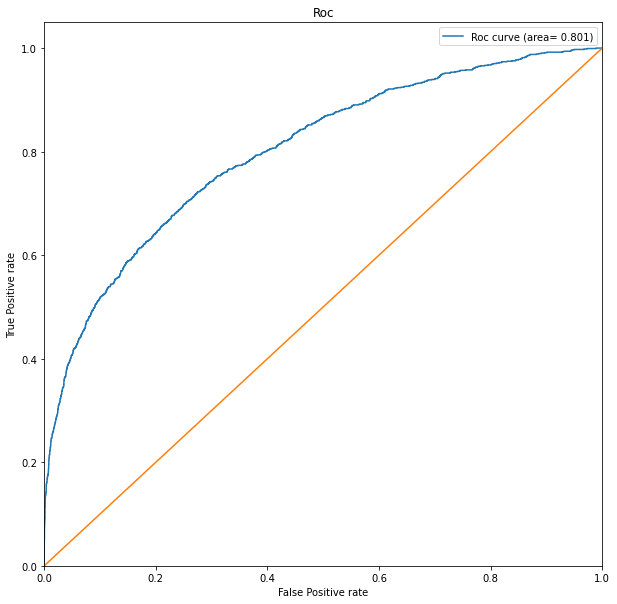

In [319]:
draw_roc(final['Churn'],final['Churn_proba'])

Here, we can say that our model is not so  good due to an average value..

In [320]:
no = [float(i/10) for i in range(1,10)]
 
for i in no:
    final[i] = final['Churn_proba'].map(lambda x: 1 if x>i else 0)
final

,Churn,Churn_proba,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5246,0,0.162702,0,1,0,0,0,0,0,0,0,0
9535,0,0.042507,0,0,0,0,0,0,0,0,0,0
6070,0,0.049055,0,0,0,0,0,0,0,0,0,0
590,0,0.100275,0,1,0,0,0,0,0,0,0,0
5917,0,0.102248,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6798,0,0.047374,0,0,0,0,0,0,0,0,0,0
7910,0,0.145689,0,1,0,0,0,0,0,0,0,0
7986,0,0.325224,0,1,1,1,0,0,0,0,0,0
8558,1,0.535293,1,1,1,1,1,1,0,0,0,0


In [321]:
cutoff = pd.DataFrame(columns=['Probs','Accuracy','Sensitivity','Specificity'])

no = [float(i/10) for i in range(1,10)]
for i in no:
    cm1 = confusion_matrix(final['Churn'],final[i])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff.loc[i] = [i,accuracy,sensitivity,specificity]
    
cutoff

,Probs,Accuracy,Sensitivity,Specificity
0.1,0.1,0.601862,0.825285,0.559086
0.2,0.2,0.772432,0.647937,0.796268
0.3,0.3,0.840011,0.511853,0.902841
0.4,0.4,0.865830,0.388938,0.957136
0.5,0.5,0.867381,0.271291,0.981509
0.6,0.6,0.861879,0.175593,0.993276
0.7,0.7,0.854966,0.105356,0.998487
0.8,0.8,0.846783,0.047410,0.999832
0.9,0.9,0.839870,0.003512,1.000000


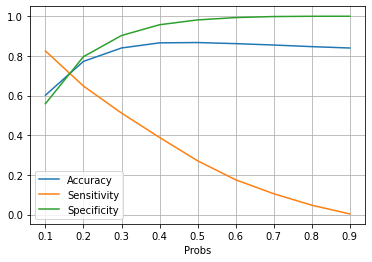

In [322]:
ax = cutoff.plot.line(x='Probs',y=["Accuracy","Sensitivity","Specificity"])
#plt.vlines(x=0.16,ymin=0,ymax=1,color='red')
plt.grid()
plt.show()

From the plot above, we can select our optimum threshold value as `0.16`

In [323]:
final['Optimum'] = final['Churn_proba'].map(lambda x: 1 if x>0.16 else 0)
y_train_final = final[['Churn','Optimum']]
y_train_final

,Churn,Optimum
5246,0,1
9535,0,0
6070,0,0
590,0,0
5917,0,0
...,...,...
6798,0,0
7910,0,0
7986,0,1
8558,1,1


In [324]:
confusion = confusion_matrix(y_train_final['Churn'],y_train_final['Optimum'])
confusion

array([[4321, 1628],
       [ 320,  819]], dtype=int64)

In [325]:
TN = confusion[0,0]   # 5120
TP = confusion[1,1]   # 932
FP = confusion[0,1]   # 864
FN = confusion[1,0]   # 932

In [326]:
accuracy = accuracy_score(y_train_final['Churn'],y_train_final['Optimum'])
accuracy

0.7251693002257337

In [327]:
# Sensitivity
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7190517998244074

In [328]:
# Specificity
Specificity = TN/float(TN+FP)
Specificity

0.7263405614388972

Now, we have created a model with our train set with average level of score..Lets validate it through the unseen dataset by our learnings..

## Evaluation

In [329]:
# Scaling the test set
X_test[num_var] = scaler.transform(X_test[num_var])
X_test

,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_level - Doctorate,Education_level - Graduate,Education_level - High School,Education_level - Post-Graduate,Education_level - Uneducated,Income_Category - $120K +,Income_Category - $40K - $60K,Income_Category - $60K - $80K,Income_Category - $80K - $120K,Income_Category - Less than $40K
3495,1,0.2,0.160979,0.534884,0.6,0.166667,0.500000,0.312346,0.720302,0.288413,...,0,0,0,0,0,0,0,1,0,0
5230,1,0.6,0.160979,0.767442,0.4,0.166667,0.500000,0.028318,0.462058,0.035030,...,0,0,0,0,1,0,0,0,1,0
1849,0,0.0,0.160979,0.837209,1.0,0.333333,0.666667,0.042164,0.639253,0.035378,...,0,0,1,0,0,0,0,0,0,1
6283,0,0.0,0.160979,0.534884,0.6,0.166667,0.333333,0.007277,0.000000,0.048561,...,0,0,0,0,1,0,0,0,0,1
8321,0,0.2,0.160979,0.511628,0.0,0.333333,0.500000,0.067408,0.000000,0.106192,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7451,0,0.6,0.160979,0.558140,0.4,0.333333,0.166667,0.098698,0.617799,0.091125,...,0,1,0,0,0,0,0,0,0,0
1357,0,0.0,0.160979,0.883721,1.0,0.500000,0.666667,0.000000,0.000000,0.041587,...,0,0,1,0,0,0,0,0,0,1
7116,0,0.6,0.160979,0.581395,1.0,0.833333,0.166667,0.036692,0.628129,0.030945,...,0,0,0,0,0,0,0,0,0,1
2611,0,0.4,0.160979,0.674419,0.4,0.333333,0.333333,0.018644,0.000000,0.059456,...,0,0,0,0,1,0,0,0,0,1


In [330]:
X_test_sm = X_test.copy()

In [331]:
X_test_sm['const'] = 1

In [332]:
X_test_sm = X_test_sm[X_train_new.columns]

In [333]:
y_test_pred = lr.predict(X_test_sm)
y_test_pred

3495    0.086566
5230    0.047654
1849    0.090391
6283    0.099083
8321    0.487362
          ...   
7451    0.079226
1357    0.379475
7116    0.027967
2611    0.269690
6044    0.042681
Length: 3039, dtype: float64

In [334]:
y_test_df = pd.DataFrame()
y_test_df['Churn_proba'] = y_test_pred
y_test_df['Churn'] = y_test

y_test_df = y_test_df[['Churn','Churn_proba']]
y_test_df

,Churn,Churn_proba
3495,0,0.086566
5230,0,0.047654
1849,0,0.090391
6283,0,0.099083
8321,0,0.487362
...,...,...
7451,0,0.079226
1357,0,0.379475
7116,0,0.027967
2611,0,0.269690


In [335]:
y_test_df.sort_values("Churn_proba",ascending=True)

,Churn,Churn_proba
9922,0,0.000751
9874,0,0.001063
9983,0,0.001691
10091,0,0.001945
9872,0,0.001959
...,...,...
2104,0,0.849001
1830,1,0.855419
7810,1,0.859079
3168,1,0.866176


In [336]:
y_test_df['Predicted'] = y_test_df['Churn_proba'].map(lambda i: 1 if i> 0.16 else 0)
y_test_df

,Churn,Churn_proba,Predicted
3495,0,0.086566,0
5230,0,0.047654,0
1849,0,0.090391,0
6283,0,0.099083,0
8321,0,0.487362,1
...,...,...,...
7451,0,0.079226,0
1357,0,0.379475,1
7116,0,0.027967,0
2611,0,0.269690,1


In [337]:
# confusion matrix
confusion = confusion_matrix(y_test_df['Churn'],y_test_df['Predicted'])
confusion

array([[1870,  681],
       [ 136,  352]], dtype=int64)

In [338]:
accuracy = accuracy_score(y_test_df['Churn'],y_test_df['Predicted'])
accuracy

0.7311615663047055

In [339]:
TN = confusion[0,0]   # 0
TP = confusion[1,1]   # 523
FP = confusion[0,1]   # 2516
FN = confusion[1,0]   # 0

In [340]:
# Sensitivity
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7213114754098361

In [341]:
# Specificity
Specificity = TN/float(TN+FP)
Specificity

0.733045864366915

Now, our model is not much good..Lets try some different techniques..

In [342]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [343]:
from sklearn.linear_model import LogisticRegression

In [344]:
Lr = LogisticRegression(random_state=50)

params = {"class_weight":['balanced',{0:0.5,1:0.95},{0:0.10,1:0.90},
                          {0:0.16,1:0.84},{0:0.20,1:0.80}]}

k_fold = KFold(n_splits=3,shuffle=False,random_state=40)

clf = RandomizedSearchCV(Lr,param_distributions=params,cv=k_fold,n_jobs=-1,verbose=1,scoring='balanced_accuracy')
clf.fit(X_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   11.1s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=False),
                   estimator=LogisticRegression(random_state=50), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 0.5, 1: 0.95},
                                                         {0: 0.1, 1: 0.9},
                                                         {0: 0.16, 1: 0.84},
                                                         {0: 0.2, 1: 0.8}]},
                   scoring='balanced_accuracy', verbose=1)

In [345]:
best_clf = clf.best_estimator_
best_clf

LogisticRegression(class_weight='balanced', random_state=50)

In [346]:
y_train_pred = best_clf.predict(X_train)

print("Confusion matrix : \n{}".format(confusion_matrix(y_train,y_train_pred)))
print(classification_report(y_train,y_train_pred))

Confusion matrix : 
[[5047  902]
 [ 176  963]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      5949
           1       0.52      0.85      0.64      1139

    accuracy                           0.85      7088
   macro avg       0.74      0.85      0.77      7088
weighted avg       0.89      0.85      0.86      7088



In [347]:
y_test_pred = best_clf.predict(X_test)

print("Confusion matrix : \n{}".format(confusion_matrix(y_test,y_test_pred)))
print(classification_report(y_test,y_test_pred))

Confusion matrix : 
[[2148  403]
 [  72  416]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2551
           1       0.51      0.85      0.64       488

    accuracy                           0.84      3039
   macro avg       0.74      0.85      0.77      3039
weighted avg       0.89      0.84      0.86      3039



Lets try another algorithm for better score..

## Model using Random forests

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [349]:
## Using Random forest
rfm = RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=10, random_state=50)

params = {"class_weight":['balanced',{0:0.5,1:0.95},{0:0.10,1:0.90},
                          {0:0.16,1:0.84},{0:0.20,1:0.80}]          
         }

clf = RandomizedSearchCV(rfm,param_distributions=params,n_jobs=-1,cv=10,scoring='f1_weighted',verbose=1)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.5s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=8, max_features=5,
                                                    min_samples_leaf=10,
                                                    random_state=50),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 0.5, 1: 0.95},
                                                         {0: 0.1, 1: 0.9},
                                                         {0: 0.16, 1: 0.84},
                                                         {0: 0.2, 1: 0.8}]},
                   scoring='f1_weighted', verbose=1)

In [350]:
best_clf = clf.best_estimator_
best_clf

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       max_features=5, min_samples_leaf=10, random_state=50)

In [351]:
y_train_pred = best_clf.predict(X_train)

print("Confusion matrix : \n{}".format(confusion_matrix(y_train,y_train_pred)))
print(classification_report(y_train,y_train_pred))

Confusion matrix : 
[[5718  231]
 [  75 1064]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5949
           1       0.82      0.93      0.87      1139

    accuracy                           0.96      7088
   macro avg       0.90      0.95      0.92      7088
weighted avg       0.96      0.96      0.96      7088



In [352]:
y_test_pred = best_clf.predict(X_test)

print("Confusion matrix : \n{}".format(confusion_matrix(y_test,y_test_pred)))
print(classification_report(y_test,y_test_pred))

Confusion matrix : 
[[2444  107]
 [  58  430]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2551
           1       0.80      0.88      0.84       488

    accuracy                           0.95      3039
   macro avg       0.89      0.92      0.90      3039
weighted avg       0.95      0.95      0.95      3039



### Now, we got an amazing score for our model, as both recall and sensitivity are high..

In [353]:
from sklearn.ensemble import GradientBoostingClassifier

In [358]:
## Using Random forest
rfm = GradientBoostingClassifier(max_depth=8, max_features=5, min_samples_leaf=10, random_state=50)

params = {"learning_rate":[0.0001,0.001,0.01,0.1,1,10,100,1000]                          
         }

clf = RandomizedSearchCV(rfm,param_distributions=params,n_jobs=-1,cv=10,scoring='f1_weighted',verbose=1)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.6min finished


RandomizedSearchCV(cv=10,
                   estimator=GradientBoostingClassifier(max_depth=8,
                                                        max_features=5,
                                                        min_samples_leaf=10,
                                                        random_state=50),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1, 10, 100,
                                                          1000]},
                   scoring='f1_weighted', verbose=1)

In [364]:
best_clf = clf.best_estimator_
best_clf

GradientBoostingClassifier(max_depth=8, max_features=5, min_samples_leaf=10,
                           random_state=50)

In [365]:
y_train_pred = best_clf.predict(X_train)

print("Confusion matrix : \n{}".format(confusion_matrix(y_train,y_train_pred)))
print(classification_report(y_train,y_train_pred))

Confusion matrix : 
[[5948    1]
 [   0 1139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5949
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088



In [366]:
y_test_pred = best_clf.predict(X_test)

print("Confusion matrix : \n{}".format(confusion_matrix(y_test,y_test_pred)))
print(classification_report(y_test,y_test_pred))

Confusion matrix : 
[[2522   29]
 [  65  423]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2551
           1       0.94      0.87      0.90       488

    accuracy                           0.97      3039
   macro avg       0.96      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039

